In [1]:
import scanpy as sc
import scvi
import numpy as np
import pandas as pd
import seaborn as sns
import os

/home/zia/.local/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/zia/.local/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [4]:
def pp(sample_path):
    # Load the sample data from .h5 file
    adata = sc.read_10x_h5(sample_path)
    adata.var_names_make_unique()

    # Continue with your analysis steps as before
    sc.pp.filter_genes(adata, min_cells=3)
    sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft=False)
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]

    adata.obs['Sample'] = os.path.basename(sample_path)  # Extract the filename as the sample name

    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]

    sc.pp.filter_cells(adata, min_genes=200)
    adata.var['mt'] = adata.var_names.str.startswith('Mt-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    
    # You can return or do further processing with 'adata' for each sample here
    # For example, you can save it to a list or dictionary for later use.

    return adata

In [6]:
sample_names = [
    'cGFPF1.h5', 'cGFPF2.h5','cGFPF3.h5', 'cGFPM1.h5',  'cGFPM2.h5', 'cGFPM3.h5',
    'cE14F1.h5', 'cE14F2.h5', 'cE14F3.h5', 'cE14M1.h5', 'cE14M2.h5', 'cE14M3.h5' 
]

# Base directory where the files are located
base_dir = '/media/zia/4CF883EAF883D11E/LC_h5/'

# Generate the list of full file paths
sample_paths = [os.path.join(base_dir, sample_name) for sample_name in sample_names]

# Create an empty list to store the processed data for each sample
processed_data_list = []

# Loop through the sample paths and process each sample
for sample_path in sample_paths:
    processed_data = pp(sample_path)
    processed_data_list.append(processed_data)

# Now, processed_data_list contains the processed data for all samples.
# You can access and analyze each processed dataset as needed.

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/an

Epoch 400/400: 100%|█| 400/400 [18:25<00:00,  2.73s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [18:25<00:00,  2.76s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 235/400:  59%|▌| 235/400 [02:11<01:32,  1.78it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.282. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [19:37<00:00,  2.93s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [19:37<00:00,  2.94s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 171/400:  43%|▍| 171/400 [01:42<02:17,  1.67it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.245. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [20:47<00:00,  3.10s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [20:47<00:00,  3.12s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 159/400:  40%|▍| 159/400 [01:41<02:33,  1.57it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.256. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 349/349: 100%|█| 349/349 [29:47<00:00,  5.10s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=349` reached.


Epoch 349/349: 100%|█| 349/349 [29:47<00:00,  5.12s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 262/400:  66%|▋| 262/400 [04:36<02:25,  1.05s/it, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.324. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [07:35<00:00,  1.13s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [07:35<00:00,  1.14s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 223/400:  56%|▌| 223/400 [00:53<00:42,  4.17it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.404. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [13:23<00:00,  2.00s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [13:23<00:00,  2.01s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 200/400:  50%|▌| 200/400 [01:24<01:24,  2.38it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.317. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [13:26<00:00,  2.01s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [13:26<00:00,  2.02s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 180/400:  45%|▍| 180/400 [01:17<01:34,  2.33it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.260. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [12:34<00:00,  1.87s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [12:34<00:00,  1.89s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [02:44<00:00,  2.46it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [02:44<00:00,  2.43it/s, v_num=1, train_loss_step


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [09:53<00:00,  1.48s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [09:53<00:00,  1.48s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 290/400:  72%|▋| 290/400 [01:29<00:33,  3.25it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.311. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [11:53<00:00,  1.80s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [11:53<00:00,  1.78s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 397/400:  99%|▉| 397/400 [02:30<00:01,  2.63it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.294. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [18:24<00:00,  2.75s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [18:24<00:00,  2.76s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 173/400:  43%|▍| 173/400 [01:41<02:12,  1.71it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.300. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_c

Epoch 400/400: 100%|█| 400/400 [12:25<00:00,  1.87s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [12:25<00:00,  1.86s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 167/400:  42%|▍| 167/400 [01:06<01:32,  2.53it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.270. Signaling Trainer to stop.


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [10]:
adata = sc.concat(processed_data_list)

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
adata.X

<35303x736 sparse matrix of type '<class 'numpy.float32'>'
	with 5349780 stored elements in Compressed Sparse Row format>

In [15]:
adata.write_h5ad('combined.h5ad')

In [20]:
adata.obs.groupby('Sample').count()

/tmp/ipykernel_3558/2340059915.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('Sample').count()


,_scvi_batch,_scvi_labels,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
Sample,,,,,,,,
cE14F1.h5,2308,2308,2308,2308,2308,2308,2308,2308
cE14F2.h5,2041,2041,2041,2041,2041,2041,2041,2041
cE14F3.h5,1337,1337,1337,1337,1337,1337,1337,1337
cE14M1.h5,2507,2507,2507,2507,2507,2507,2507,2507
cE14M2.h5,4034,4034,4034,4034,4034,4034,4034,4034
cE14M3.h5,3527,3527,3527,3527,3527,3527,3527,3527
cGFPF1.h5,2597,2597,2597,2597,2597,2597,2597,2597
cGFPF2.h5,3257,3257,3257,3257,3257,3257,3257,3257
cGFPF3.h5,2708,2708,2708,2708,2708,2708,2708,2708


In [21]:
adata.layers['counts'] = adata.X.copy()

In [22]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [23]:
adata.obs.head()

,_scvi_batch,_scvi_labels,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCAAGCAACCAG-1,0,0,cGFPF1.h5,False,266,266,561.0,0.0,0.0
AAACCCAAGCTCGAAG-1,0,0,cGFPF1.h5,False,277,277,1536.0,0.0,0.0
AAACCCAAGCTGACCC-1,0,0,cGFPF1.h5,False,319,319,986.0,0.0,0.0
AAACCCACAGCACAAG-1,0,0,cGFPF1.h5,False,433,433,1485.0,0.0,0.0
AAACCCAGTCATGGCC-1,0,0,cGFPF1.h5,False,470,470,2108.0,0.0,0.0


In [24]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts'])

In [25]:
model = scvi.model.SCVI(adata)

In [26]:
model.train() #may take a while without GPU

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 227/227: 100%|█| 227/227 [14:29<00:00,  3.82s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=227` reached.


Epoch 227/227: 100%|█| 227/227 [14:29<00:00,  3.83s/it, v_num=1, train_loss_step


In [27]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [ ]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [31]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

/home/zia/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zia/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zia/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopyth

In [34]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.25)

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will b

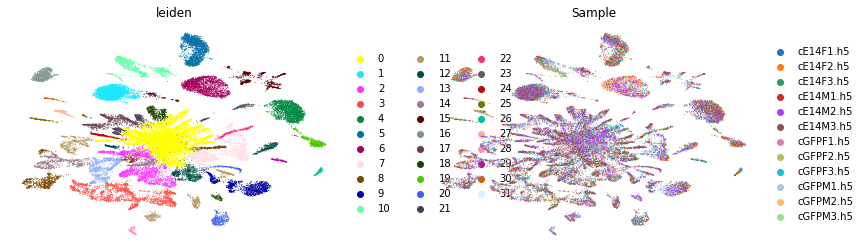

In [35]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

In [36]:
adata.write_h5ad('integrated.h5ad')

In [40]:
sc.tl.leiden(adata, resolution = 0.25)

In [41]:
sc.tl.rank_genes_groups(adata, 'leiden')

/home/zia/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/zia/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/zia/.local/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is 

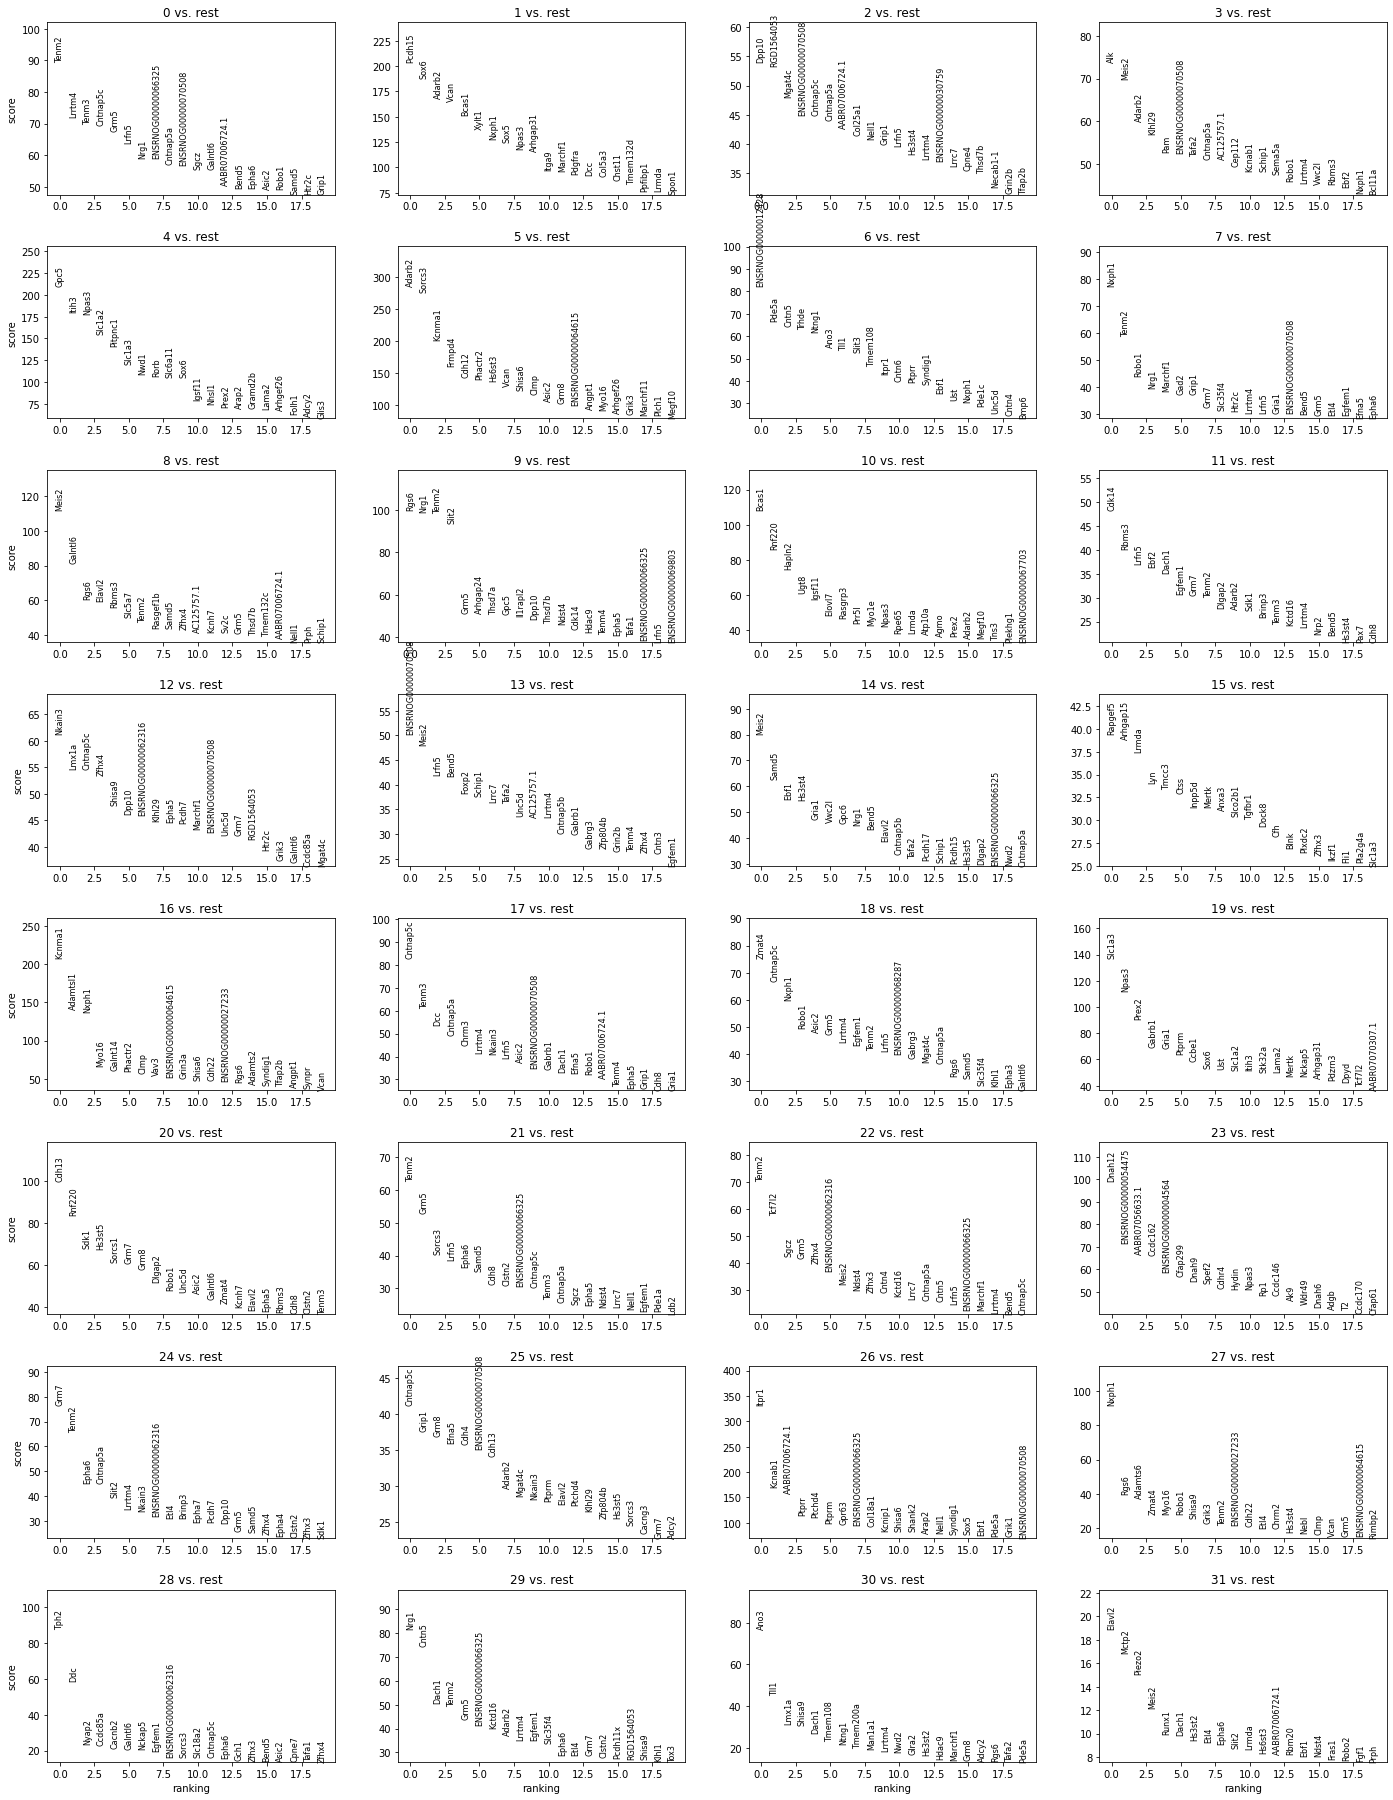

In [42]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [43]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,Tenm2,89.491295,2.464792,0.000000,0.000000
1,0,Lrrtm4,72.164871,2.175533,0.000000,0.000000
2,0,Tenm3,69.948997,2.315284,0.000000,0.000000
3,0,Cntnap5c,69.415947,2.502234,0.000000,0.000000
4,0,Grm5,67.603279,2.262207,0.000000,0.000000
...,...,...,...,...,...,...
22937,31,Cpne4,2.491364,1.648086,0.019712,0.033428
22938,31,St6galnac5,2.484309,1.639621,0.020027,0.033885
22939,31,Adamts6,2.416458,1.775642,0.023295,0.039055
22940,31,Dlc1,2.394550,1.243201,0.024443,0.040794


In [44]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|████████████████████████████████████| 32/32 [01:38<00:00,  3.08s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Skor2,0.9664,0.0336,3.359051,0.000169,0.000046,0.0,0.25,3.367625,3.465653,3.829139,...,0.063865,0.021476,0.039379,0.008692,0.895369,0.144804,True,0 vs Rest,0,Rest
ENSRNOG00000064428,0.9642,0.0358,3.293351,0.000273,0.000071,0.0,0.25,3.167305,3.194520,3.069465,...,0.100215,0.025822,0.048719,0.014134,1.346647,0.415880,True,0 vs Rest,0,Rest
AABR07038983.1,0.9628,0.0372,3.253537,0.000002,0.000009,0.0,0.25,-0.637400,-0.710814,4.364617,...,0.000252,0.002411,0.000252,0.001059,0.010290,0.087217,True,0 vs Rest,0,Rest
Slc17a8,0.9564,0.0436,3.088119,0.000142,0.000063,0.0,0.25,2.267925,2.419458,2.347576,...,0.037612,0.022242,0.018427,0.015011,0.595600,0.305302,True,0 vs Rest,0,Rest
RGD1560028,0.9564,0.0436,3.088119,0.000145,0.000043,0.0,0.25,2.993533,2.897007,3.071701,...,0.077875,0.022206,0.052253,0.015486,1.119066,0.268076,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cacnb2,0.6818,0.3182,0.762056,0.004038,0.003963,0.0,0.25,0.124648,0.178492,0.627832,...,1.230769,2.658663,0.461538,0.690138,8.010035,38.724087,False,31 vs Rest,31,Rest
Rimbp2,0.6748,0.3252,0.729976,0.001460,0.001593,0.0,0.25,0.017936,-0.088655,0.895389,...,0.923077,1.146429,0.423077,0.496527,4.791934,15.713843,False,31 vs Rest,31,Rest
Arhgap18,0.6486,0.3514,0.612891,0.001996,0.001866,0.0,0.25,0.259217,0.050227,0.840289,...,1.346154,1.283204,0.538462,0.484990,7.627295,15.954350,False,31 vs Rest,31,Rest
ENSRNOG00000067302,0.5930,0.4070,0.376381,0.000620,0.000584,0.0,0.25,0.109656,0.129695,0.478627,...,1.192308,0.372720,0.500000,0.241942,7.430889,5.492836,False,31 vs Rest,31,Rest


In [45]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Skor2,0.9664,0.0336,3.359051,0.000169,0.000046,0.0,0.25,3.367625,3.465653,3.829139,...,0.063865,0.021476,0.039379,0.008692,0.895369,0.144804,True,0 vs Rest,0,Rest
ENSRNOG00000064428,0.9642,0.0358,3.293351,0.000273,0.000071,0.0,0.25,3.167305,3.194520,3.069465,...,0.100215,0.025822,0.048719,0.014134,1.346647,0.415880,True,0 vs Rest,0,Rest
Slc17a8,0.9564,0.0436,3.088119,0.000142,0.000063,0.0,0.25,2.267925,2.419458,2.347576,...,0.037612,0.022242,0.018427,0.015011,0.595600,0.305302,True,0 vs Rest,0,Rest
RGD1560028,0.9564,0.0436,3.088119,0.000145,0.000043,0.0,0.25,2.993533,2.897007,3.071701,...,0.077875,0.022206,0.052253,0.015486,1.119066,0.268076,True,0 vs Rest,0,Rest
Lef1,0.9548,0.0452,3.050405,0.000190,0.000111,0.0,0.25,2.007133,1.977131,2.778250,...,0.040263,0.036121,0.020952,0.015595,0.716307,1.118019,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Clmp,0.9232,0.0768,2.486641,0.001359,0.001656,0.0,0.25,0.759902,0.982299,1.460247,...,2.384616,0.671939,0.769231,0.287043,17.704744,13.837432,True,31 vs Rest,31,Rest
Ugt8,0.9228,0.0772,2.481013,0.000826,0.000897,0.0,0.25,1.238960,1.372433,1.768279,...,0.115385,0.217077,0.115385,0.126683,0.468038,8.098950,True,31 vs Rest,31,Rest
Npas1,0.9226,0.0774,2.478209,0.000298,0.000226,0.0,0.25,1.228233,1.264817,1.792671,...,0.038462,0.120929,0.038462,0.075006,0.847170,1.474255,True,31 vs Rest,31,Rest
Hs6st3,0.9222,0.0778,2.472621,0.008678,0.004807,0.0,0.25,1.298141,1.126012,1.360197,...,27.846153,3.995922,0.923077,0.468634,149.035797,51.786110,True,31 vs Rest,31,Rest


/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


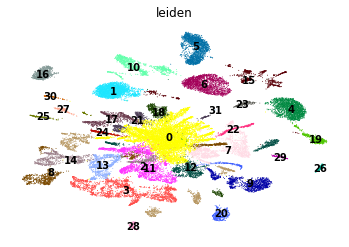

In [46]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

In [51]:
sc.pl.umap(adata, color=['Slc17a7', 'Slc17a6', 'Camk2a', 'Nefh', 'Tbr1', 'Satb2', 'Ctip2', 'Rorb', 'Brn2', 'Nrgn', 'Syt1', 'Calb2'], frameon = False, layer = 'scvi_normalized', vmax = 5)
#, layer = 'scvi_normalized'

KeyError: 'Could not find key Slc17a7 in .var_names or .obs.columns.'

<Figure size 1978.56x864 with 0 Axes>

In [53]:
sc.pl.umap(adata, color=['Gad1', 'Gad2', 'Pv', 'Sst', 'Vip', 'Calb1', 'Nos1', 'Npy', 'Cck', 'Th', 'Pax6', 'Calr'], frameon = False, layer = 'scvi_normalized', vmax = 5)
#, layer = 'scvi_normalized'

KeyError: 'Could not find key Gad1 in .var_names or .obs.columns.'

<Figure size 1978.56x864 with 0 Axes>

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


KeyError: 'Could not find key P2ry12 in .var_names or .obs.columns.'

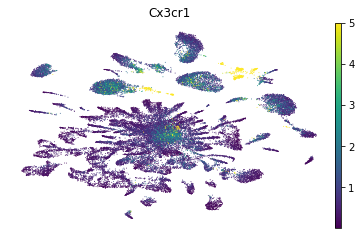

In [54]:
sc.pl.umap(adata, color=['Cx3cr1', 'P2ry12', 'Tmem119', 'Trem2', 'Itgam', 'Aif1', 'Cd68', 'Cd45', 'C1qa', 'C1qb', 'C1qc', 'Csf1r', 'Marco', 'Cd11c'], frameon = False, layer = 'scvi_normalized', vmax = 5)
#, layer = 'scvi_normalized'

KeyError: 'Could not find key S100b in .var_names or .obs.columns.'

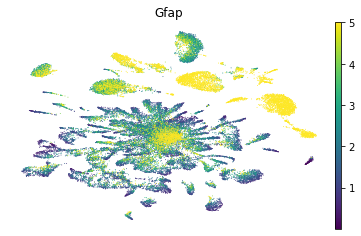

In [55]:
sc.pl.umap(adata, color=['Gfap', 'S100b', 'Aldh1l1', 'Glul', 'Acsa-2', 'Sox9', 'Cd44', 'Aqp4', 'Kir4.1', 'Pdgfra', 'Glt-1'], frameon = False, layer = 'scvi_normalized', vmax = 5)
#, layer = 'scvi_normalized'

In [56]:
sc.pl.umap(adata, color=['Olig1', 'Olig2', 'Mog', 'Mag', 'Cnp', 'Mbp', 'Plp1', 'Mobp', 'Pdgfra', 'Maguk', 'Opalin', 'Pdgfrb'], frameon = False, layer = 'scvi_normalized', vmax = 5)
#, layer = 'scvi_normalized'

KeyError: 'Could not find key Olig1 in .var_names or .obs.columns.'

<Figure size 1978.56x864 with 0 Axes>